## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [41]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [42]:
columns_to_select = ["City Name", "Package", "Variety", "Origin", "Item Size", "Color"]
pumpkins = full_pumpkins.loc[:, columns_to_select]
pumpkins.dropna(inplace=True)

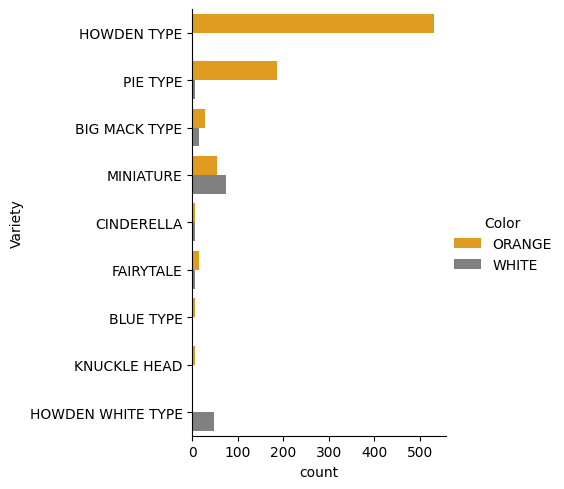

In [43]:
import seaborn as sb

palette = ["orange", "grey"]

sb.catplot(data=pumpkins, y="Variety", hue="Color", kind="count", palette=palette)

### Ordinal Encoder for ordinal features of the dataset

In [44]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [pumpkins["Item Size"].unique()]
ordinal_features = ["Item Size"]
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

### Categorical Encoder for categorical features of the dataset

In [45]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["City Name", "Package", "Variety", "Origin"]
categorical_encoder = OneHotEncoder(sparse_output=False)

### Apply Column Transformer to combine the Ordinal and Categorical Encoders in the Data Frame

In [46]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("ord", ordinal_encoder, ordinal_features), ("cat", categorical_encoder, categorical_features)])
ct.set_output(transform="pandas")
encoded_features = ct.fit_transform(pumpkins)

### Label Encoder to encode the Color

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins["Color"])

### Merge results into new Data Frame

In [48]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

### Visualizing relationships in the data

/tmp/ipykernel_18834/2095724520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)


/home/error/Schreibtisch/ml/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/error/Schreibtisch/ml/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

/home/error/Schreibtisch/ml/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/error/Schreibtisch/ml/ML-For-Beginners/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


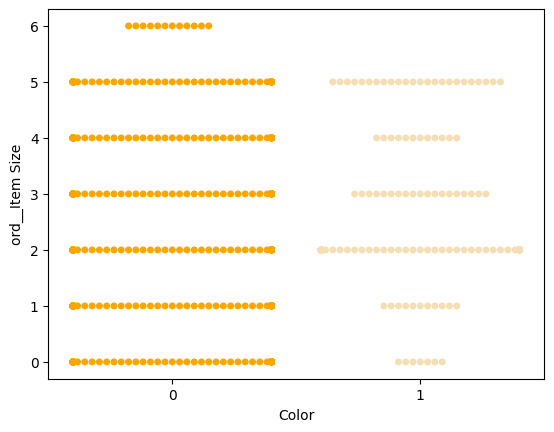

In [49]:
palette = ["orange", "wheat"]
sb.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)

### Seperate features and label and split data into training and test sets

In [50]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(["Color"])]
y = encoded_pumpkins["Color"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fit Logistic Regression model

In [51]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluate the model and print the results

In [52]:
print(classification_report(y_test, predictions))
print("Predicted labels: ", predictions)
print("F1-score: ", f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


### ROC Curve

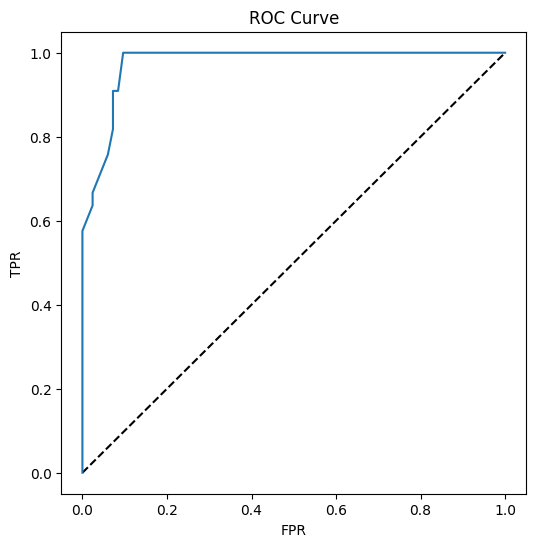

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

fig = plt.figure(figsize = (6, 6))
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [56]:
auc = roc_auc_score(y_test, y_scores[:, 1])
print(auc)

0.9759036144578312
